In [1]:
import os
import sys
sys.path.insert(0, '../')
import ccal
%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

import numpy as np
import pandas as pd

==================== Computational Cancer Analysis Library ====================
<19:53:37> Checking library dependencies ...
<19:53:37> Using the following libraries:
<19:53:37> 	scipy (v0.18.0)
<19:53:37> 	statsmodels (v0.6.1)
<19:53:37> 	scikit-learn (v0.17.1)
<19:53:37> 	seaborn (v0.7.1)
<19:53:37> 	rpy2 (v2.8.2)
<19:53:37> 	pandas (v0.18.1)
<19:53:37> 	matplotlib (v1.5.1)
<19:53:37> 	numpy (v1.11.1)
<19:53:37> Planted a random seed 20121020.


In [2]:
pd.read_csv('./ccle_hema_k_9_H_1000clustering_new.txt', sep='\t', index_col=0).index

Int64Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            25, 30],
           dtype='int64', name='state')

# Get states

In [3]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
nclustering = 1000
states_filename = 'ccle_hema_k_9_H_1000clustering.txt'

In [4]:
# labels, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename=states_filename)

# Map Onco GPS

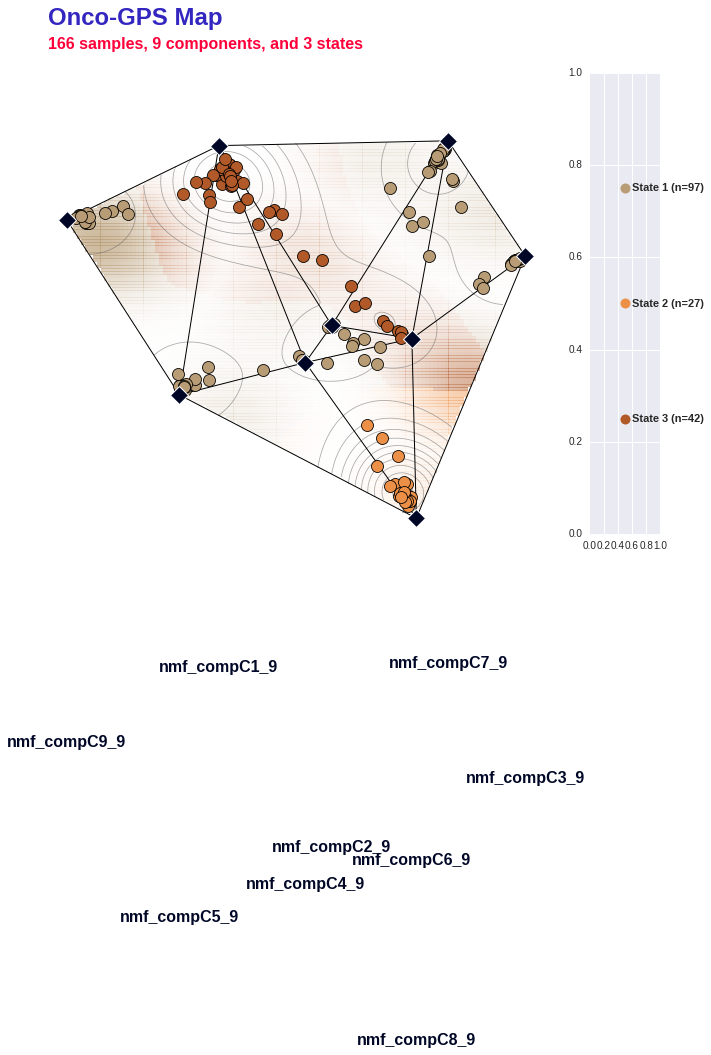

KeyboardInterrupt: 

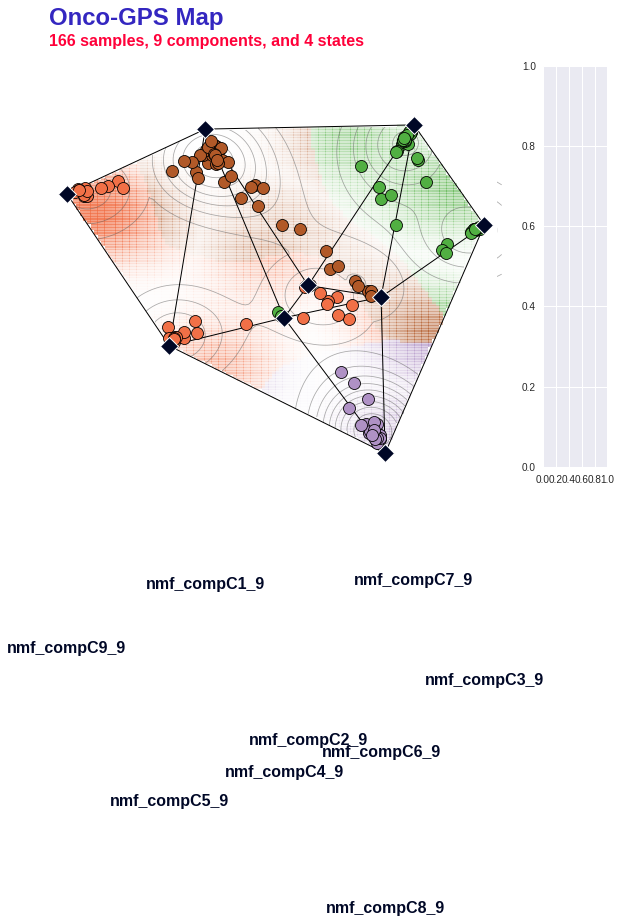

In [5]:
labels = pd.read_csv(states_filename, index_col=0, sep='\t')
annotations = np.random.random_sample(labels.shape[1] - 1)
for n_state in n_states_to_explore:
    states = labels.ix[n_state, :-1].astype(int).tolist()
    ccal.visualize.plot_onco_gps(h, n_state, states, output_filename='ccle_hema_k_9_H_1000clustering_s{}_random_annotation.pdf'.format(n_state), mds_metric=False)
    #ccal.visualize.plot_onco_gps(h, n_state, states, output_filename='ccle_hema_k_9_H_1000clustering_s{}.pdf'.format(n_state))